In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei einlesen
df = pd.read_csv(
    "../../data/Rohdaten/GeschlechtAlterQuartiere_csv/GeschlechtAlterQuartiere.csv",
    delimiter=",",
    quotechar='"',
    encoding="utf-8"
)



# Überblick über Struktur
print("Datentypen:")
print(df.dtypes)

print("\nNullwerte pro Spalte:")
print(df.isnull().sum().sort_values(ascending=False))

print("\nForm:", df.shape)

print("\nErste 5 Zeilen:")
print(df.head())

print("\nEindeutige Werte pro Spalte:")
print(df.nunique().sort_values(ascending=False))

print("\nSpalten mit nur einem Wert:")
print(df.columns[df.nunique() <= 1])

# Doppelte Zeilen prüfen
print("\nDoppelte Zeilen:", df.duplicated().sum())

# Werteüberblick über Alter und Geschlecht
if "Alter" in df.columns and "Geschlecht" in df.columns:
    print("\nAltersverteilung:")
    print(df["Alter"].value_counts().sort_index())

    print("\n👥 Geschlechterverteilung:")
    print(df["Geschlecht"].value_counts())


Datentypen:
StichtagDatJahr     int64
AlterVSort          int64
AlterVCd            int64
AlterV05Sort        int64
AlterV05Cd          int64
AlterV05Kurz       object
AlterV10Cd          int64
AlterV10Kurz       object
AlterV20Cd          int64
AlterV20Kurz       object
SexCd               int64
SexLang            object
SexKurz            object
KreisCd             int64
KreisLang          object
QuarSort            int64
QuarCd              int64
QuarLang           object
HerkunftSort        int64
HerkunftCd          int64
HerkunftLang       object
AnzBestWir          int64
dtype: object

Nullwerte pro Spalte:
StichtagDatJahr    0
AlterVSort         0
HerkunftLang       0
HerkunftCd         0
HerkunftSort       0
QuarLang           0
QuarCd             0
QuarSort           0
KreisLang          0
KreisCd            0
SexKurz            0
SexLang            0
SexCd              0
AlterV20Kurz       0
AlterV20Cd         0
AlterV10Kurz       0
AlterV10Cd         0
AlterV05Kurz       0
A

### 📝 Datenprüfung: Alters- und Geschlechtsstruktur nach Quartier (`GeschlechtAlterQuartiere.csv`)

Der Datensatz enthält **soziodemografische Strukturdaten der Bevölkerung der Stadt Zürich**. Er umfasst **395'968 Einträge** mit insgesamt **22 Spalten**, welche die Einwohnerzahl (`AnzBestWir`) nach **Stichtag**, **Alter**, **Geschlecht**, **Herkunft** sowie **geografischer Zuordnung (Quartier, Kreis)** gliedern.

**Datenstruktur:**
- Alle Spalten wurden korrekt erkannt und typisiert (`int`, `object`).
- Die wichtigsten Merkmale umfassen:
  - **`StichtagDatJahr`**: Jahr der Erhebung (32 verschiedene Jahre)
  - **`AlterV05Kurz`**: Altersklasse in 5er-Schritten (z.B. "65-69", "70-74")
  - **`SexLang` / `SexKurz`**: Geschlecht (männlich / weiblich)
  - **`QuarLang`**: Quartiersbezeichnung (34 Quartiere)
  - **`HerkunftLang`**: Herkunft (Schweizer*in / Ausländer*in)
  - **`AnzBestWir`**: Anzahl Personen in dieser Kategorie

**Nullwerte:**
- Der gesamte Datensatz ist **vollständig** – es gibt keine Nullwerte.

**Eindeutige Werte pro Spalte:**
- Es existieren:
  - **21 Altersgruppen** (`AlterV05Kurz`)
  - **34 Quartiere** (`QuarLang`)
  - **2 Geschlechter**, **2 Herkunftsgruppen**
  - **248 verschiedene Werte für `AnzBestWir`** (Einwohnerzahlen)

**Doppelte Einträge:**
- Es wurden **keine doppelten Zeilen** gefunden → sehr gute Datenqualität.

**Fazit:**
Der Datensatz eignet sich hervorragend für:
- die **Analyse altersgerechter Infrastruktur**,
- die Ermittlung von **Quartieren mit hohem Anteil älterer Personen** (z.B. 65+),
- sowie für **geschlechts- oder herkunftsspezifische Auswertungen**.

Für unsere Projektarbeit zur WC-Versorgung kann daraus ein **aggregierter Kennwert pro Quartier** gebildet werden – z.B. die **Gesamtanzahl an Personen über 65**, um diese mit der Anzahl öffentlicher Toiletten zu vergleichen.


In [26]:
# Alle Altersgruppen über 65
altersgruppen_65plus = [
    "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"
]

# Filter anwenden
df_65plus = df[df["AlterV05Kurz"].isin(altersgruppen_65plus)]

# Aggregation nach Quartier
df_65_agg = df_65plus.groupby("QuarLang")["AnzBestWir"].sum().reset_index()
df_65_agg.columns = ["Quartier", "Einwohner_65plus"]

# Sortiert anzeigen
df_65_agg = df_65_agg.sort_values(by="Einwohner_65plus", ascending=False)
df_65_agg.head()


,Quartier,Einwohner_65plus
3,Altstetten,162060
15,Höngg,144254
1,Albisrieden,132133
33,Wollishofen,110125
0,Affoltern,108816


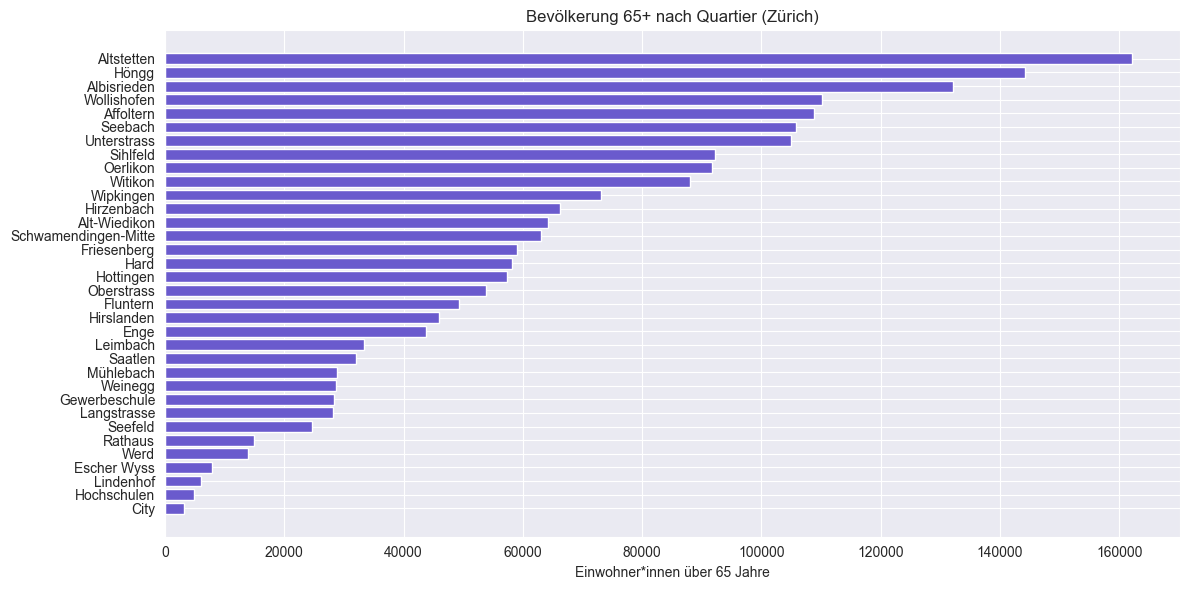

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(df_65_agg["Quartier"], df_65_agg["Einwohner_65plus"], color="slateblue")
plt.xlabel("Einwohner*innen über 65 Jahre")
plt.title("Bevölkerung 65+ nach Quartier (Zürich)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [28]:
# Nur gewünschte Spalten behalten
df_reduced = df[[
    "StichtagDatJahr",
    "AlterV05Kurz",
    "KreisCd",
    "SexKurz",
    "QuarLang",
    "HerkunftCd",
    "AnzBestWir"
]]

# Übersicht der neuen Struktur
print(df_reduced.head())
print("\nNeue Form:", df_reduced.shape)


   StichtagDatJahr AlterV05Kurz  KreisCd SexKurz     QuarLang  HerkunftCd  \
0             1993          0-4        1       M      Rathaus           1   
1             1993          0-4        1       W      Rathaus           1   
2             1993          0-4        1       M      Rathaus           2   
3             1993          0-4        1       W      Rathaus           2   
4             1993          0-4        1       M  Hochschulen           1   

   AnzBestWir  
0          11  
1           8  
2           1  
3           6  
4           1  

Neue Form: (395968, 7)


In [29]:
# Anzahl Zeilen vor der Aggregation
print("Anzahl Zeilen vor Aggregation:", len(df_reduced))

# Aggregation durchführen
df_aggregated = df_reduced.groupby(
    ["StichtagDatJahr", "AlterV05Kurz", "KreisCd", "SexKurz", "HerkunftCd"],
    as_index=False
).agg({
    "AnzBestWir": "sum"
})

# Spalten sinnvoll auf Englisch umbenennen
df_aggregated.rename(columns={
    "StichtagDatJahr": "Year",
    "AlterV05Kurz": "AgeGroup",
    "KreisCd": "Kreis",
    "SexKurz": "Sex",
    "HerkunftCd": "Origin",
    "AnzBestWir": "PopulationCount"
}, inplace=True)

# Anzahl Zeilen nach der Aggregation
print("Anzahl Zeilen nach Aggregation:", len(df_aggregated))

# Überblick über die neuen Daten
print("\nErste Zeilen nach Aggregation:")
print(df_aggregated.head())


Anzahl Zeilen vor Aggregation: 395968
Anzahl Zeilen nach Aggregation: 31025

Erste Zeilen nach Aggregation:
   Year AgeGroup  Kreis Sex  Origin  PopulationCount
0  1993      0-4      1   M       1               66
1  1993      0-4      1   M       2               13
2  1993      0-4      1   W       1               54
3  1993      0-4      1   W       2               19
4  1993      0-4      2   M       1              478


## 🔄 Aggregation und Umbenennung der Spalten

Die Datensätze wurden aggregiert, indem gleiche Kombinationen von Jahr, Altersgruppe, Kreis, Geschlecht und Herkunft zusammengefasst und die Anzahl Personen summiert wurde.

Anschliessend wurden die Spalten auf sinnvolle englische Begriffe umbenannt (`Year`, `AgeGroup`, `Kreis`, `Sex`, `Origin`, `PopulationCount`), um die Datenstruktur klarer und international verständlich zu machen.


In [30]:
# Altersgruppen, die du behalten möchtest
alter_65_plus = [
    "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99"
]

# Neuen DataFrame nur mit Altersgruppen ab 65 Jahren erstellen
df_65plus = df_aggregated[df_aggregated["AgeGroup"].isin(alter_65_plus)].copy()

# Überblick
print("Form des neuen df_65plus:", df_65plus.shape)
print("\nErste Zeilen:")
print(df_65plus.head())


Form des neuen df_65plus: (10379, 6)

Erste Zeilen:
     Year AgeGroup  Kreis Sex  Origin  PopulationCount
641  1993    65-69      1   M       1               93
642  1993    65-69      1   M       2                9
643  1993    65-69      1   W       1              128
644  1993    65-69      1   W       2               13
645  1993    65-69      2   M       1              663


In [31]:
# Funktion zur Qualitätsprüfung eines DataFrames
def check_data_quality(df, name="DataFrame"):
    print(f"📋 Qualitätsprüfung für {name}\n")

    # Datentypen
    print("1. Datentypen:")
    print(df.dtypes)

    # Nullwerte
    print("\n2. Nullwerte pro Spalte:")
    print(df.isnull().sum().sort_values(ascending=False))

    # Form
    print("\n3. Form (Zeilen, Spalten):", df.shape)

    # Eindeutige Werte
    print("\n4. Eindeutige Werte pro Spalte:")
    print(df.nunique().sort_values(ascending=False))

    # Doppelte Zeilen
    print("\n5. Anzahl doppelter Zeilen:", df.duplicated().sum())

    # Vorschau
    print("\n6. Erste 5 Zeilen:")
    print(df.head())

    print("\n" + "-"*60 + "\n")

# Qualitätsprüfung für df_aggregated
check_data_quality(df_aggregated, "df_aggregated (alle Altersgruppen)")

# Qualitätsprüfung für df_65plus
check_data_quality(df_65plus, "df_65plus (ab 65 Jahren)")


📋 Qualitätsprüfung für df_aggregated (alle Altersgruppen)

1. Datentypen:
Year                int64
AgeGroup           object
Kreis               int64
Sex                object
Origin              int64
PopulationCount     int64
dtype: object

2. Nullwerte pro Spalte:
Year               0
AgeGroup           0
Kreis              0
Sex                0
Origin             0
PopulationCount    0
dtype: int64

3. Form (Zeilen, Spalten): (31025, 6)

4. Eindeutige Werte pro Spalte:
PopulationCount    1836
Year                 32
AgeGroup             21
Kreis                12
Sex                   2
Origin                2
dtype: int64

5. Anzahl doppelter Zeilen: 0

6. Erste 5 Zeilen:
   Year AgeGroup  Kreis Sex  Origin  PopulationCount
0  1993      0-4      1   M       1               66
1  1993      0-4      1   M       2               13
2  1993      0-4      1   W       1               54
3  1993      0-4      1   W       2               19
4  1993      0-4      2   M       1           

## Interpretation und Vorgehen

Nach der Spaltenreduktion wurde der Datensatz sinnvoll aggregiert: Alle Zeilen mit identischen Kombinationen von Jahr, Altersgruppe, Kreis, Geschlecht und Herkunft wurden zusammengefasst und die Anzahl Personen (`AnzBestWir`) summiert.

Zusätzlich wurde ein separater Datensatz `df_65plus` erstellt, der nur Personen ab 65 Jahren enthält.

### Qualitätsprüfung `df_aggregated`:
- **Keine Nullwerte**, **keine Duplikate**, saubere Datentypen.
- **31'025 Zeilen**, deckt alle Altersgruppen ab.
- Daten sind vollständig und bereit für Analysen.

### Qualitätsprüfung `df_65plus`:
- **Keine Nullwerte**, **keine Duplikate**, korrekte Filterung.
- **10'379 Zeilen**, nur Altersgruppen ab 65 Jahren.
- Optimal für spezifische Analysen der älteren Bevölkerung.

In [32]:
# Aggregierten vollständigen DataFrame speichern
df_aggregated.to_csv(
    "../../data/Cleaned/GeschlechtAlterQuartiere_aggregiert.csv",
    index=False,
    encoding="utf-8"
)

# DataFrame für 65+ Altersgruppen speichern
df_65plus.to_csv(
    "../../data/Cleaned/GeschlechtAlterQuartiere_65plus.csv",
    index=False,
    encoding="utf-8"
)

print("✅ Beide Dateien wurden erfolgreich gespeichert!")

✅ Beide Dateien wurden erfolgreich gespeichert!
